# **Bridging Schema**

### ***Loading Libraries***

In [1]:
!pip install hypertune

In [2]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


In [3]:
!pip install tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 14.9 MB/s eta 0:00:00


In [4]:
!pip install feast --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.6/206.6 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
!pip show feast

Name: feast
Version: 0.39.0
Summary: Python SDK for Feast
Home-page: https://github.com/feast-dev/feast
Author: Feast
Author-email: 
License: Apache
Location: /root/.local/lib/python3.10/site-packages
Requires: click, colorama, dask, dill, fastapi, gunicorn, Jinja2, jsonschema, mmh3, mypy-protobuf, numpy, pandas, protobuf, pyarrow, pydantic, pygments, PyYAML, requests, SQLAlchemy, tabulate, tenacity, toml, tqdm, typeguard, uvicorn
Required-by: 


In [7]:
# Operating Systems
import os
import sys
import shutil
import pathlib
import argparse
# from feast import Client
# from feast import FeatureStore


# Numerical Computing
import numpy as np

# Data Manipuation
import pandas as pd

# SciPy
import scipy
from scipy import stats
from scipy import signal
from scipy.io import wavfile

# Data Visualization
import itertools
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

# Tabulate
from tabulate import tabulate

# Hyperparameter Tuning
import hypertune

# Tools
from setuptools import setup
from setuptools import find_packages

# BigQuery
from google.cloud import bigquery
from google.colab import auth

# Scikit-Learn
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_recall_fscore_support as score

# Extreme Gradient Boosting
import xgboost as xgb

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# TensorFlow
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import Model
import tensorflow_datasets as tfds
from tensorflow_hub import KerasLayer
from tensorflow import feature_column as fc
from tensorflow.python.framework import dtypes
from tensorflow.keras.preprocessing import text
from tensorflow.keras.utils import to_categorical
from tensorflow_io.bigquery import BigQueryClient
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import callbacks, layers, models, utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Input, Flatten, Conv2D, MaxPooling2D, Lambda

# Keras API
import kerastuner as kt

<ipython-input-7-0fd1fc672d4c>:85: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [8]:
# User Authentication
auth.authenticate_user()

# BigQuery Library
# !pip install --upgrade google-cloud-bigquery

In [9]:
project_id = 'core-catalyst-425922-v9'
os.environ['GOOGLE_CLOUD_PROJECT'] = project_id

# BigQuery Client Config
client = bigquery.Client(project=project_id)

### ***Building Dataset***

In [10]:
sns.set(rc={'figure.figsize':(10, 10)})

def set_payment_type(prob):
    # 30% of transactions are cash
    if prob < 0.3:
        return 'Cash'

    # stretch the remaining 0.3-1.0 to 0-1
    prob = (prob-0.3)/0.7
    if prob < 0.1:
        return 'Gift'
    if prob < 0.4:
        return 'Debit'
    return 'Credit'

def create_dataset(N, is_old_format):
    order_amount = 5 + np.abs(np.random.normal(scale=10, size=N)) # 5+, peaks at 15
    order_distance = 1 + np.random.rand(N)*4  # 1-5
    payment_type = np.random.rand(N)

    df = pd.DataFrame.from_dict({
        'order_amount' : np.round(order_amount, 2),
        'order_distance': np.round(order_distance, 1),
        'payment_type': np.vectorize(set_payment_type)(payment_type),
        'tip': np.zeros_like(order_amount)
    })

    df.loc[df['payment_type'] == 'Cash', 'tip'] = 0.2
    df.loc[df['payment_type'] == 'Gift', 'tip'] = 0.1
    df.loc[df['payment_type'] == 'Debit',  'tip'] = 0.15
    df.loc[df['payment_type'] == 'Credit', 'tip'] = 0.25

    df['tip'] = np.round(df['tip'] * df['order_amount'] + 0.5*df['order_distance'], 1)

    if is_old_format:
        df.loc[df['payment_type'] != 'Cash', 'payment_type'] = 'Card'

    return df

In [11]:
df = create_dataset(5, False)
df

,order_amount,order_distance,payment_type,tip
0,17.83,1.4,Debit,3.4
1,7.13,3.5,Credit,3.5
2,21.25,4.6,Debit,5.5
3,18.75,2.6,Gift,3.2
4,14.25,2.6,Gift,2.7


In [12]:
df = create_dataset(5, True)
df

,order_amount,order_distance,payment_type,tip
0,15.85,4.5,Card,4.6
1,5.45,1.2,Card,1.1
2,15.88,4.0,Card,4.4
3,28.26,1.4,Card,4.9
4,17.85,2.6,Card,4.0


## **Bridging**

In [13]:
df_new = create_dataset(5000, False)

df_old = create_dataset(1000*1000, True)

### ***How Many Samples Do We Need to Evaluate Properly?***

In [14]:
N_train = (int) (len(df_old) * 0.5)

N_eval = len(df_old) - N_train

In [15]:
model = LinearRegression()

enc = OneHotEncoder(handle_unknown='ignore')

df_train = enc.fit_transform( df_old.loc[:N_train, df.columns != 'tip'] )

model.fit(df_train, df_old.loc[:N_train, 'tip'])

LinearRegression()

In [16]:
df_eval = enc.transform( df_old.loc[N_train:, df.columns != 'tip'] )

model.score(df_eval, df_old.loc[N_train:, 'tip'])

0.7907046990914279

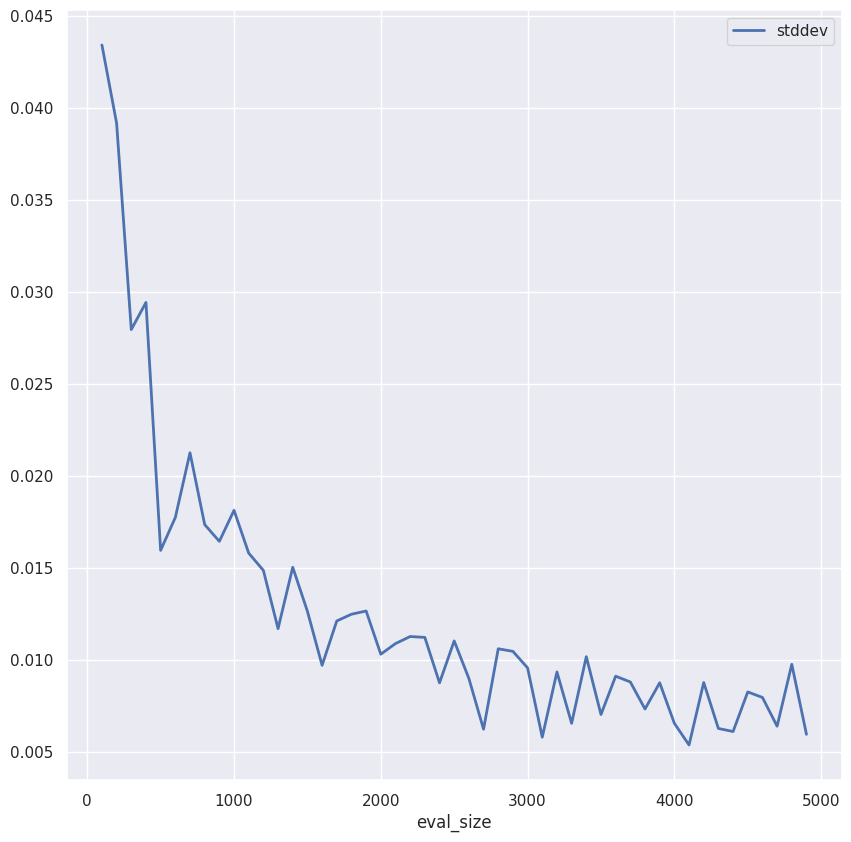

In [17]:
sizes = []
score_mean = []
score_stddev = []
for subset_size in range(100, 5000, 100):
    sizes.append(subset_size)

    scores = []
    for x in range(1, 25):
        indices = np.random.choice(N_eval, size=subset_size, replace=False)
        scores.append(
            model.score(df_eval[indices], df_old.loc[N_train+indices, 'tip'])
        )
    score_mean.append(np.mean(scores))
    score_stddev.append(np.std(scores))
scores = pd.DataFrame.from_dict({
    'eval_size': sizes,
    'score': score_mean,
    'stddev': score_stddev
})

scores.plot(x='eval_size', y='stddev', linewidth=2);

In [18]:
N_NEW = 2000

### ***Bridging Schema using Static Approach***

In [19]:
df_train_new = df_new.loc[N_NEW:, :]

counts = df_train_new.groupby('payment_type').count()
counts

,order_amount,order_distance,tip
payment_type,,,
Cash,883,883,883
Credit,1260,1260,1260
Debit,662,662,662
Gift,195,195,195


In [20]:
num_credit = counts.loc['Credit', 'tip']

num_debit = counts.loc['Debit', 'tip']

num_gift = counts.loc['Gift', 'tip']

num_total = num_gift + num_debit + num_credit
imputed_value = [
    0,
    num_gift / num_total,
    num_debit / num_total,
    num_credit / num_total
]

print(imputed_value)

[0, 0.09211147850732168, 0.3127066603684459, 0.5951818611242324]


In [21]:
bridged_old = df_old.copy()

bridged_old['encoded_cash'] = 1
bridged_old['encoded_gift'] = 0
bridged_old['encoded_debit'] = 0
bridged_old['encoded_credit'] = 0

bridged_old.loc[bridged_old['payment_type'] == 'Card', 'encoded_cash'] = imputed_value[0]
bridged_old.loc[bridged_old['payment_type'] == 'Card', 'encoded_gift'] = imputed_value[1]
bridged_old.loc[bridged_old['payment_type'] == 'Card', 'encoded_debit'] = imputed_value[2]
bridged_old.loc[bridged_old['payment_type'] == 'Card', 'encoded_credit'] = imputed_value[3]

bridged_old.drop(columns='payment_type', inplace=True)

bridged_old[:10]

,order_amount,order_distance,tip,encoded_cash,encoded_gift,encoded_debit,encoded_credit
0,6.00,2.0,2.5,0,0.092111,0.312707,0.595182
1,12.08,4.4,4.0,0,0.092111,0.312707,0.595182
2,10.53,1.7,2.4,0,0.092111,0.312707,0.595182
3,6.52,1.5,2.4,0,0.092111,0.312707,0.595182
4,10.96,4.5,5.0,0,0.092111,0.312707,0.595182
5,8.95,4.2,3.0,0,0.092111,0.312707,0.595182
6,10.30,4.7,4.9,0,0.092111,0.312707,0.595182
7,8.87,3.0,3.3,1,0.000000,0.000000,0.000000
8,28.09,3.4,7.3,1,0.000000,0.000000,0.000000
9,8.10,4.3,3.4,0,0.092111,0.312707,0.595182


### ***Preparing New Data***

In [22]:
encoded_new = df_new.copy()

encoded_new['encoded_cash'] = 0
encoded_new['encoded_gift'] = 0
encoded_new['encoded_debit'] = 0
encoded_new['encoded_credit'] = 0

encoded_new.loc[encoded_new['payment_type'] == 'Cash', 'encoded_cash'] = 1
encoded_new.loc[encoded_new['payment_type'] == 'Gift', 'encoded_gift'] = 1
encoded_new.loc[encoded_new['payment_type'] == 'Debit', 'encoded_debit'] = 1
encoded_new.loc[encoded_new['payment_type'] == 'Credit', 'encoded_credit'] = 1

encoded_new.drop(columns='payment_type', inplace=True)

encoded_new[:5]

,order_amount,order_distance,tip,encoded_cash,encoded_gift,encoded_debit,encoded_credit
0,15.73,2.2,5.0,0,0,0,1
1,20.27,2.9,5.5,1,0,0,0
2,11.87,2.5,4.2,0,0,0,1
3,12.79,3.9,3.2,0,1,0,0
4,5.84,3.8,2.5,0,1,0,0


In [23]:
encoded_new_eval = encoded_new.loc[:N_NEW, :]

evalX = encoded_new_eval.loc[:, encoded_new_eval.columns != 'tip']

evalY = encoded_new_eval.loc[:, 'tip']

encoded_new_train = encoded_new.loc[N_NEW:, :]

### ***Augmented Training Dataset***

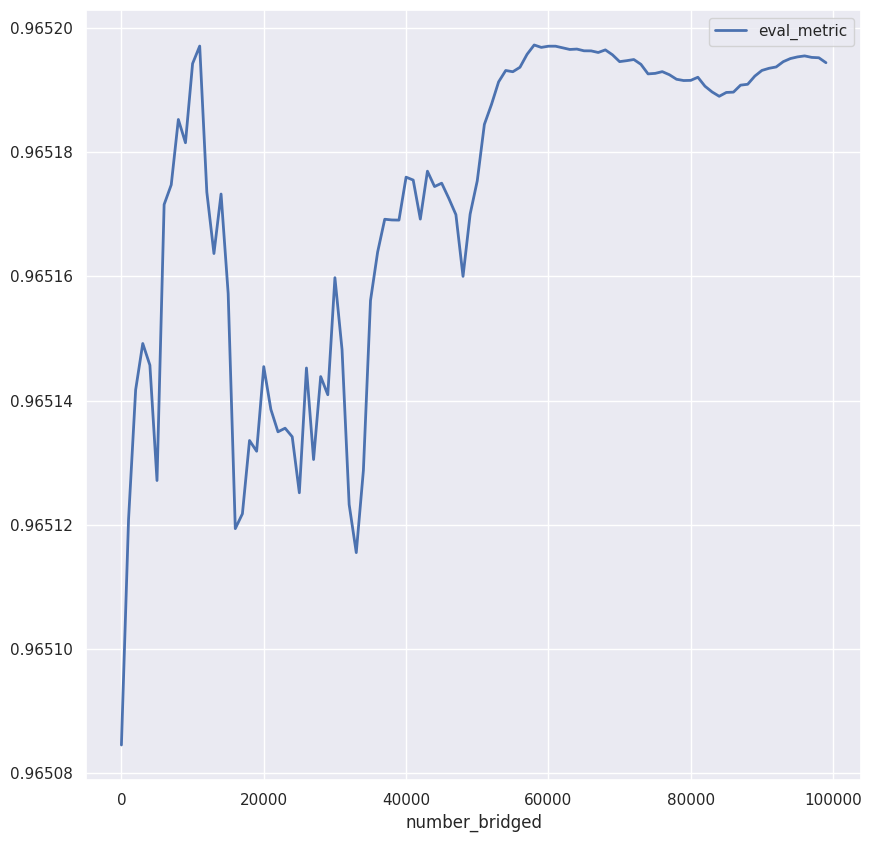

In [24]:
bridged_examples = []

scores = []

for num_bridged in range(0, 1000*100, 1000):
    bridged_examples.append(num_bridged)
    df_train = pd.concat([encoded_new_train, bridged_old[:num_bridged]], ignore_index=True)
    X = df_train.loc[:, df_train.columns != 'tip']
    Y = df_train.loc[:, 'tip']
    model.fit(X, Y)
    scores.append(model.score(evalX, evalY))

scores = pd.DataFrame.from_dict({
    'number_bridged': bridged_examples,
    'eval_metric': scores
})

scores.plot(x='number_bridged', y='eval_metric', linewidth=2);